In [23]:
#visualisasi hasil ConvexHull
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 
data = datasets.load_breast_cancer() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
def myConvexHull(sorted_arr):
    #sort the array
    p1 = 0
    pn = len(sorted_arr)-1

    #list index titik di sorted_arr yang bisa jadi convexhull
    toBeHull = []

    #eliminate index titik yang gamungkin convexhull (karena di garis p1pn)
    i = 1
    while(i != len(sorted_arr)-1):
        right = (sorted_arr[pn][1]-sorted_arr[p1][1])*(sorted_arr[i][0] - sorted_arr[p1][0])
        left = (sorted_arr[pn][0]-sorted_arr[p1][0])*(sorted_arr[i][1] - sorted_arr[p1][1])
        if(right != left):
            toBeHull.append(int(i))
        i += 1
    
    #sort list
    toBeHull.sort()
    #tentuin kanan kiri
    s1 = [] #di kiri
    s2 = [] #di kanan
    s1 = diKiri(p1, pn, toBeHull, sorted_arr)
    s2 = diKiri(pn, p1, toBeHull, sorted_arr)
    # inisialisasi array titik solusi
    S = [0, len(sorted_arr)-1]
    fh1 = findHull(s1, p1, pn, sorted_arr)
    fh2 = findHull(s2, pn, p1, sorted_arr)
    # jika hasil fungsi tidak ada maka tidak akan ditambahkan dalam array solusi
    if fh1 != None:
        S += fh1
    if fh2 != None:
        S += fh2

    # inisialisasi array sebelah kiri (S1) dan kanan (S2)
    S1 = []
    S2 = []
    for i in S:
        if isDiKiri(p1, pn, i, sorted_arr) and i != p1 and i != pn:
            S1.append(i)
        elif isDiKiri(pn, p1, i, sorted_arr) and i != p1 and i != pn:
            S2.append(i)
    S1.sort()
    S2.sort()

    #inisialisasi array solusi final dengan titik p1 ke titik pertama di S1
    #agar array final berisi kumpulan array of index yang menggambarkan ujung garis-garis
    Sf = [[p1, S1[0]]]
    Sf.append([p1, S2[0]])
    # semua titik akan disambungkan ke titik selanjutnya, titik terakhir disambungkan ke pn
    for i in range(len(S1)-1):
        Sf.append([S1[i], S1[i+1]])
    for i in range(len(S2)-1):
        Sf.append([S2[i], S2[i+1]])
    Sf.append([S1[-1], pn])
    Sf.append([S2[-1], pn])
    return Sf

#cari Hullnya    
def findHull(s, p1, pn, sorted_arr):
    if len(s) == 0:
        return s
    else:
        # simpan titik terjauh
        terjauh = titikTerjauh(s, p1, pn, sorted_arr)
        #inisialsasi array titik terjauh
        fs = [terjauh]

        #pisahkan titik yang berada di kiri garis p/pn-titik terjauh
        S11 = diKiri(p1, terjauh, s, sorted_arr)
        S12 = diKiri(terjauh, pn, s, sorted_arr)


        #cari lagi untuk himpunan titik di sebelah kiri garis p1-titik terjauh
        fh1 = findHull(S11, p1, terjauh, sorted_arr) 
        fh2 = findHull(S12, terjauh, pn, sorted_arr)

        #jika ada hasilnya, tambahkan ke array final, jika tidak abaikan
        if fh1 != None:
            fs += fh1 
        if fh2 != None:
            fs += fh2
        return fs

# untuk membagi titik di kanan dan kiri garis p1pn 
def diKiri(p1, pn, toBeHull, sorted_arr):
    s1 = [] #di kiri
    for i in toBeHull:
        if isDiKiri(p1, pn, i, sorted_arr) and not(isInLine(p1, pn, i, sorted_arr)): #kalau ada di kiri garis dan ga di garis
            s1.append(i)
    return s1

#cari terjauh
def titikTerjauh(s, p1, pn, sorted_arr):
    p1 = np.asarray(sorted_arr[p1])
    pn = np.asarray(sorted_arr[pn])
    pmax = -1
    dmax = -1
    for i in s:
        #menghitung jarak titik ke garis
        d = np.abs(np.cross(pn-p1, p1-sorted_arr[i])) / np.linalg.norm(pn-p1)

        #jika jarak lebih besar dari jarak maksimal
        if d > dmax:
            #ubah jarak maksimal dan ubah index titik terjauh
            dmax = d
            pmax = i
    return pmax

#untuk mengecek apakah titik checked ada di garis p1-pn
def isInLine(p1, pn, checked, sorted_arr):
    right = (sorted_arr[pn][1]-sorted_arr[p1][1])*(sorted_arr[checked][0] - sorted_arr[p1][0])
    left = (sorted_arr[pn][0]-sorted_arr[p1][0])*(sorted_arr[checked][1] - sorted_arr[p1][1])
    if(right == left):
        return True
    return False

#untuk mengecek apakah titik checked berada di sebelah kiri (luar) garis p1-pn
def isDiKiri(p1, pn, checked, sorted_arr):
    det = (sorted_arr[p1][0]*sorted_arr[pn][1]) + (sorted_arr[checked][0]*sorted_arr[p1][1]) + (sorted_arr[pn][0]*sorted_arr[checked][1]) - (sorted_arr[checked][0]*sorted_arr[pn][1]) - (sorted_arr[pn][0]*sorted_arr[p1][1]) - (sorted_arr[p1][0]*sorted_arr[checked][1])
    if det > 0:
        return True
    return False

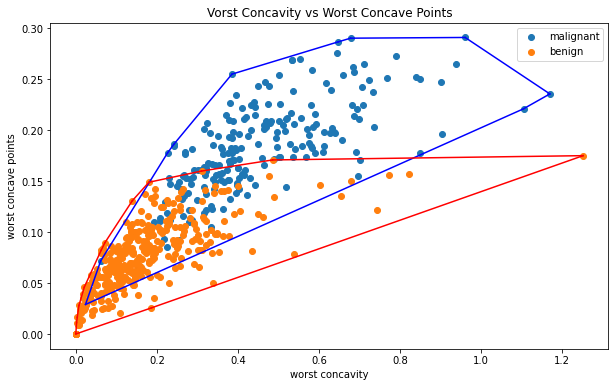

In [26]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Vorst Concavity vs Worst Concave Points')
plt.xlabel(data.feature_names[26])
plt.ylabel(data.feature_names[27])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[26, 27]].values
    bucket = bucket[np.lexsort((bucket[:, 1], (bucket[:,0])))]
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()